<a href="https://colab.research.google.com/github/luorix1/ML_DL-self_study/blob/main/LSTM_GRU.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import tensorflow as tf
import numpy as np
import pandas as pd
from tensorflow import keras
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [3]:
(train_input, train_target), (test_input, test_target) = keras.datasets.imdb.load_data(num_words=500)
train_input, val_input, train_target, val_target = train_test_split(train_input, train_target, test_size=0.2)

17473536/17464789 [==============================] - 0s 0us/step


In [4]:
train_seq = keras.preprocessing.sequence.pad_sequences(train_input, maxlen=100)
val_seq = keras.preprocessing.sequence.pad_sequences(val_input, maxlen=100)

In [5]:
model = keras.Sequential()
model.add(keras.layers.Embedding(500, 16, input_length=100))
model.add(keras.layers.LSTM(8))
model.add(keras.layers.Dense(1, activation='sigmoid'))

In [6]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 100, 16)           8000      
_________________________________________________________________
lstm (LSTM)                  (None, 8)                 800       
_________________________________________________________________
dense (Dense)                (None, 1)                 9         
Total params: 8,809
Trainable params: 8,809
Non-trainable params: 0
_________________________________________________________________


In [7]:
rmsprop = keras.optimizers.RMSprop(learning_rate=1e-4)
model.compile(optimizer=rmsprop, loss='binary_crossentropy', metrics=['accuracy'])
checkpoint_cb = keras.callbacks.ModelCheckpoint('best-lstm-model.h5')
early_stopping_cb = keras.callbacks.EarlyStopping(patience=3, restore_best_weights=True)
history = model.fit(train_seq, train_target, epochs=100, batch_size=64, validation_data=(val_seq, val_target), callbacks=[checkpoint_cb, early_stopping_cb])

Epoch 1/100
313/313 [==============================] - 14s 37ms/step - loss: 0.6923 - accuracy: 0.5475 - val_loss: 0.6912 - val_accuracy: 0.6090
Epoch 2/100
313/313 [==============================] - 11s 34ms/step - loss: 0.6888 - accuracy: 0.6338 - val_loss: 0.6855 - val_accuracy: 0.6614
Epoch 3/100
313/313 [==============================] - 11s 35ms/step - loss: 0.6761 - accuracy: 0.6548 - val_loss: 0.6580 - val_accuracy: 0.6800
Epoch 4/100
313/313 [==============================] - 11s 34ms/step - loss: 0.6209 - accuracy: 0.7117 - val_loss: 0.5911 - val_accuracy: 0.7422
Epoch 5/100
313/313 [==============================] - 11s 35ms/step - loss: 0.5785 - accuracy: 0.7451 - val_loss: 0.5630 - val_accuracy: 0.7546
Epoch 6/100
313/313 [==============================] - 11s 35ms/step - loss: 0.5534 - accuracy: 0.7578 - val_loss: 0.5443 - val_accuracy: 0.7686
Epoch 7/100
313/313 [==============================] - 11s 35ms/step - loss: 0.5319 - accuracy: 0.7689 - val_loss: 0.5212 - val_ac

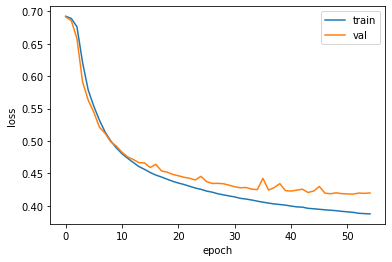

In [8]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'val'])
plt.show()

In [9]:
model2 = keras.Sequential()
model2.add(keras.layers.Embedding(500, 16, input_length=100))
model2.add(keras.layers.LSTM(8, dropout=0.3))
model2.add(keras.layers.Dense(1, activation='sigmoid'))

In [9]:
rmsprop = keras.optimizers.RMSprop(learning_rate=1e-4)
model2.compile(optimizer=rmsprop, loss='binary_crossentropy', metrics=['accuracy'])
checkpoint_cb = keras.callbacks.ModelCheckpoint('best-lstm-model.h5')
early_stopping_cb = keras.callbacks.EarlyStopping(patience=3, restore_best_weights=True)
history = model2.fit(train_seq, train_target, epochs=100, batch_size=64, validation_data=(val_seq, val_target), callbacks=[checkpoint_cb, early_stopping_cb])

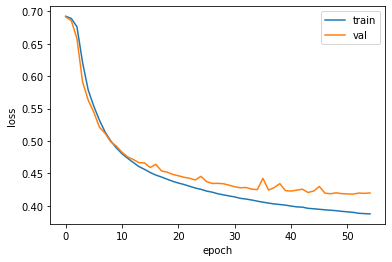

In [10]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'val'])
plt.show()

In [13]:
model3 = keras.Sequential()
model3.add(keras.layers.Embedding(500, 16, input_length=100))
model3.add(keras.layers.LSTM(8, dropout=0.3, return_sequences=True))
model3.add(keras.layers.LSTM(8, dropout=0.3))
model3.add(keras.layers.Dense(1, activation='sigmoid'))

In [14]:
rmsprop = keras.optimizers.RMSprop(learning_rate=1e-4)
model3.compile(optimizer=rmsprop, loss='binary_crossentropy', metrics=['accuracy'])
checkpoint_cb = keras.callbacks.ModelCheckpoint('best-lstm-model.h5')
early_stopping_cb = keras.callbacks.EarlyStopping(patience=3, restore_best_weights=True)
history = model3.fit(train_seq, train_target, epochs=100, batch_size=64, validation_data=(val_seq, val_target), callbacks=[checkpoint_cb, early_stopping_cb])

Epoch 1/100
313/313 [==============================] - 26s 73ms/step - loss: 0.6928 - accuracy: 0.5271 - val_loss: 0.6921 - val_accuracy: 0.5714
Epoch 2/100
313/313 [==============================] - 22s 70ms/step - loss: 0.6909 - accuracy: 0.5921 - val_loss: 0.6889 - val_accuracy: 0.6240
Epoch 3/100
313/313 [==============================] - 22s 70ms/step - loss: 0.6837 - accuracy: 0.6287 - val_loss: 0.6734 - val_accuracy: 0.6808
Epoch 4/100
313/313 [==============================] - 22s 69ms/step - loss: 0.6386 - accuracy: 0.6809 - val_loss: 0.5874 - val_accuracy: 0.7214
Epoch 5/100
313/313 [==============================] - 22s 70ms/step - loss: 0.5700 - accuracy: 0.7194 - val_loss: 0.5417 - val_accuracy: 0.7370
Epoch 6/100
313/313 [==============================] - 22s 69ms/step - loss: 0.5407 - accuracy: 0.7351 - val_loss: 0.5158 - val_accuracy: 0.7522
Epoch 7/100
313/313 [==============================] - 22s 71ms/step - loss: 0.5183 - accuracy: 0.7502 - val_loss: 0.4900 - val_ac

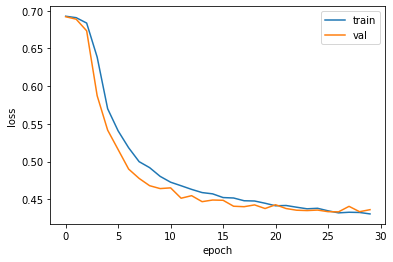

In [15]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'val'])
plt.show()